Sentiment analysis was performed on a dataset of Tweets for various US airlines on Twitter. We began by importing the necessary libraries, loading the data, and preprocessing it to prepare it for classification. The data was split into training and testing sets, and text was vectorized using the CountVectorizer from scikit-learn.

Five different classification models were trained on the training set, including Naive Bayes, K-Nearest Neighbors (KNN), Support Vector Machine (SVM), Random Forest, and Gradient Boosting Classifier (GBC). The models were used to predict the sentiment of the test set, and the performance of each model was evaluated using precision, recall, and F1-score. The evaluation results were then plotted using seaborn.

We also plotted the precision, recall, and F1-score for each model with respect to each sentiment class, and compared the overall weighted scores of each model using a bar plot. This analysis was done to determine which model performed the best in predicting the sentiment of the Tweets. The results show that GBC performed the best overall with the highest weighted average F1-score, followed by SVM and Random Forest.

Citation: 

Crowdflower. (2016). "Airline Twitter Sentiment". Retrieved from https://data.world/crowdflower/airline-twitter-sentiment
SUMMARY:
A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

Rai, Sawan. (2021). "An Empirical study of Machine Learning Classifiers with Tweet Sentiment Classification". https://www.analyticsvidhya.com/blog/2021/11/an-empirical-study-of-machine-learning-classifier-with-tweet-sentiment-classification/
SUMMARY:
In this post, we will discuss the sentiment analysis problem. We have taken the Twitter US airline sentiment dataset for this empirical study. We will train various classification models and compare the performance metrics to extract useful insights.

#### Import Libraries

In [1]:
#This code imports the necessary libraries for data analysis, visualization, and machine learning using Python.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn import preprocessing

## Data Wrangling & Cleaning

In [2]:
#Load CSV file into a pandas DataFrame
folder = 'C:/Users/vinhm/OneDrive/Documents/School Documents/Springboard/Springboard/Capstone Project 3.1'
data_encode = "ISO-8859-1" #The encoding parameter is set to "ISO-8859-1", which is the character encoding used in the file.

data = pd.read_csv(folder+'/Data/Airline-Sentiment-2-w-AA.csv', encoding=data_encode)
# data = data.head(1000)
print(data)

        _unit_id  _golden _unit_state  _trusted_judgments _last_judgment_at  \
0      681448150    False   finalized                   3      2/25/15 5:24   
1      681448153    False   finalized                   3      2/25/15 1:53   
2      681448156    False   finalized                   3     2/25/15 10:01   
3      681448158    False   finalized                   3      2/25/15 3:05   
4      681448159    False   finalized                   3      2/25/15 5:50   
...          ...      ...         ...                 ...               ...   
14635  681679794    False   finalized                   3     2/25/15 19:46   
14636  681679795    False   finalized                   3     2/25/15 19:14   
14637  681679796    False   finalized                   3     2/25/15 19:04   
14638  681679797    False   finalized                   3     2/25/15 18:59   
14639  681679798    False   finalized                   3     2/25/15 19:06   

      airline_sentiment  airline_sentiment:confiden

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   _unit_id                      14640 non-null  int64  
 1   _golden                       14640 non-null  bool   
 2   _unit_state                   14640 non-null  object 
 3   _trusted_judgments            14640 non-null  int64  
 4   _last_judgment_at             14584 non-null  object 
 5   airline_sentiment             14640 non-null  object 
 6   airline_sentiment:confidence  14640 non-null  float64
 7   negativereason                9178 non-null   object 
 8   negativereason:confidence     10522 non-null  float64
 9   airline                       14640 non-null  object 
 10  airline_sentiment_gold        40 non-null     object 
 11  name                          14640 non-null  object 
 12  negativereason_gold           32 non-null     object 
 13  r

In [4]:
print(data.airline_sentiment.isna().sum()) #There are no NaN values in 'airline_sentiment' column.

0


In [5]:
print(data.text.isna().sum()) #There are no NaN values in 'text' column.

0


In [6]:
#This code imports several modules that are commonly used for text data processing and cleaning in Natural Language Processing (NLP) tasks.
import re
import emoji
from nltk.tokenize import TweetTokenizer

#This code defines a function named preprocess_text_data() that takes a string of text data as input and returns a preprocessed version of it.
def preprocess_text_data(text):
    tknzr = TweetTokenizer()
    tokens = tknzr.tokenize(text)
    
    processed_tokens = []
    for token in tokens:
        # Replaces any username in the text with the string <USER> using a regular expression that matches the pattern of Twitter usernames.
        if re.match("^@[A-Za-z0-9_]+", token):
            processed_tokens.append("<USER>") 
        # Replaces any number in the text with the string <NUMBER> using a regular expression that matches the pattern of numbers.
        elif re.match("^[0-9]+", token):
            processed_tokens.append("<NUMBER>")
        # Replaces any emoji in the text with its text description using the demojize() function from the emoji library.
        elif token in emoji.EMOJI_DATA:
            processed_tokens.append(emoji.demojize(token))
        else:
            processed_tokens.append(token)
    
    return " ".join(processed_tokens)

## Exploratory Data Analysis

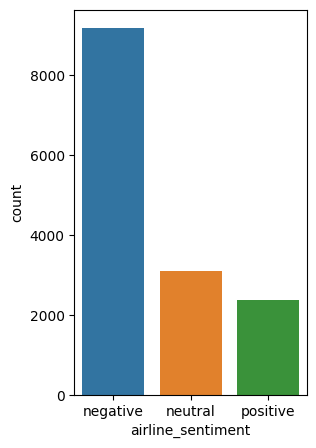

In [7]:
plt.figure(figsize=(3,5))
sns.countplot(data=data, x='airline_sentiment', order=data['airline_sentiment'].value_counts().index)
plt.show()

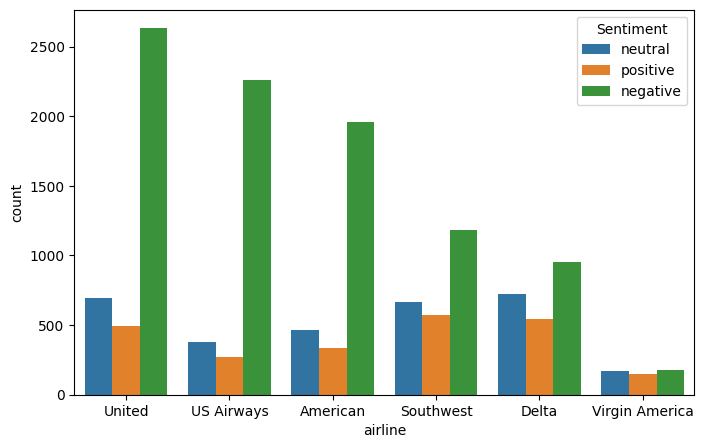

In [8]:
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='airline', hue='airline_sentiment', order=data['airline'].value_counts().index)
plt.legend(title='Sentiment')
plt.show()

Most responses for each airline seem to be negative.

In [9]:
#Feature Engineering
from sklearn import preprocessing
le = preprocessing.LabelEncoder() #Encode categorical labels with numerical values.
le.fit(data.airline_sentiment) 
data['categorical_label'] = le.transform(data.airline_sentiment) #Creates a new column called 'categorical_label' for Encoded data.

In [10]:
data.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,...,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone,categorical_label
0,681448150,False,finalized,3,2/25/15 5:24,neutral,1.0000,NaN,NaN,Virgin America,...,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/15 11:35,5.703060e+17,NaN,Eastern Time (US & Canada),1
1,681448153,False,finalized,3,2/25/15 1:53,positive,0.3486,NaN,0.0000,Virgin America,...,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada),2
2,681448156,False,finalized,3,2/25/15 10:01,neutral,0.6837,NaN,NaN,Virgin America,...,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/15 11:15,5.703010e+17,Lets Play,Central Time (US & Canada),1
3,681448158,False,finalized,3,2/25/15 3:05,negative,1.0000,Bad Flight,0.7033,Virgin America,...,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada),0
4,681448159,False,finalized,3,2/25/15 5:50,negative,1.0000,Can't Tell,1.0000,Virgin America,...,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/15 11:14,5.703010e+17,NaN,Pacific Time (US & Canada),0


For Sentiment Analysis '_unit_id', '_golden', '_unit_state', '_trusted_judgments', '_last_judgment_at', 'airline_sentiment:confidence', 'negativereason', 'negativereason:confidence', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'retweet_count', 'tweet_coord', 'tweet_created', 'tweet_id', 'tweet_location' and 'user_timezone' were not used as they did not contribute to the sentiment of the tweet. 
Only two columns are necessary for Sentiment Analysis 'airline_sentiment' and 'text'.

## Training Data

In [11]:
X = []
Y = []
for idx in data.index:
    X.append(preprocess_text_data(data['text'][idx])) #Appies the 'preprocess_text_data' function to the 'text' column and appends it to the 'X' list
    Y.append(data['categorical_label'][idx]) #Appends the 'Y' list with the corresponding 'categorical_label'
# Train-Test splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
labels = ['Negative','Neutral', 'Positive']  # For further use...

## Modeling and Model Metrics

Function to calculate the following metrics to evaluate the model.

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

# This utility function will be used to evaluate the other models also.
def show_performance_data(Y_test, Y_pred, model_name):
    # Generate classification report
    report = classification_report(Y_test, Y_pred, target_names=labels, output_dict=True)
    df_report = pd.DataFrame(report).transpose()
    
    # Save classification report as Excel file
    df_report.to_excel('classification_report_{}.xlsx'.format(model_name))
    
    # Print classification report
    print(df_report)
    
    # Generate confusion matrix
    cm = confusion_matrix(Y_test, Y_pred)
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    
    # Visualize confusion matrix as heatmap
    plt.figure(figsize=(7,5))
    sns.heatmap(df_cm, annot=True, cmap='gist_earth_r', fmt='g')
    plt.title('Confusion Matrix ({})'.format(model_name))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    
    # Save confusion matrix as PNG image
    plt.savefig('confusion_matrix_{}.png'.format(model_name), bbox_inches='tight')
    
    # Show confusion matrix plot
    plt.show()
    
    return report
#This code imports the classification_report() and confusion_matrix() functions from the sklearn.metrics module. These functions are used to evaluate the performance of a classification model.

## Model testing

### Naive Bayes classifier

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Convert the text data into numerical feature vectors using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Naive Bayes classifier on the training data
NB = MultinomialNB()
NB.fit(X_train_vectorized, y_train)

# Make predictions on the testing data
y_pred = NB.predict(X_test_vectorized)

              precision    recall  f1-score      support
Negative       0.769319  0.962617  0.855181  2782.000000
Neutral        0.686354  0.365114  0.476662   923.000000
Positive       0.816667  0.499272  0.619693   687.000000
accuracy       0.764572  0.764572  0.764572     0.764572
macro avg      0.757447  0.609001  0.650512  4392.000000
weighted avg   0.759290  0.764572  0.738798  4392.000000


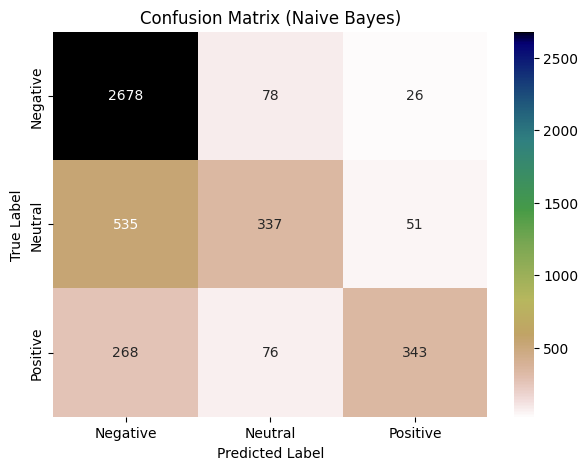

In [14]:
results_NB = show_performance_data(y_test, y_pred, 'Naive Bayes')

In [15]:
#Calculates the Accuracy for the model
accuracies_NB = []
for label in labels:
    precision = results_NB[label]['precision']
    recall = results_NB[label]['recall']
    support = results_NB[label]['support']
    accuracy = (precision * recall) / (precision + recall) * support
    accuracies_NB.append(accuracy)

#Extracts the Precision, Recall and F1-scores from the Performance data 'results_NB'
precision_scores_NB = [results_NB[label]['precision'] for label in labels]
recall_scores_NB = [results_NB[label]['recall'] for label in labels]
f1_scores_NB = [results_NB[label]['f1-score'] for label in labels]

### Support Vector Machines (SVM)

In [16]:
from sklearn.svm import SVC

# Train a SVM classifier on the training data
SVM = SVC()
SVM.fit(X_train_vectorized, y_train)

# Make predictions on the testing data
y_pred = SVM.predict(X_test_vectorized)

              precision    recall  f1-score     support
Negative       0.817341  0.921639  0.866363  2782.00000
Neutral        0.630051  0.540628  0.581924   923.00000
Positive       0.816415  0.550218  0.657391   687.00000
accuracy       0.783470  0.783470  0.783470     0.78347
macro avg      0.754602  0.670829  0.701893  4392.00000
weighted avg   0.777836  0.783470  0.773899  4392.00000


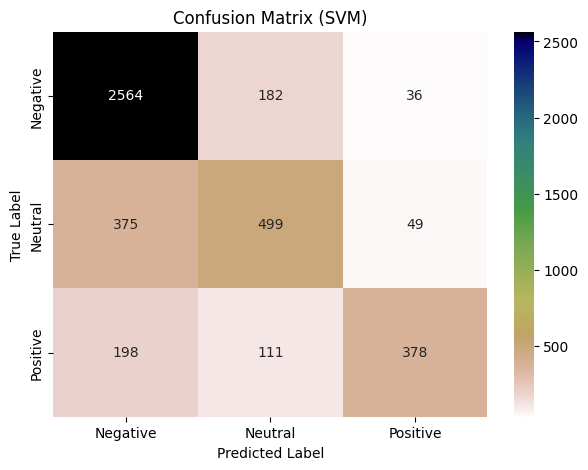

In [17]:
results_SVM = show_performance_data(y_test, y_pred, 'SVM')

In [18]:
accuracies_SVM = []
for label in labels:
    precision = results_SVM[label]['precision']
    recall = results_SVM[label]['recall']
    support = results_SVM[label]['support']
    accuracy = (precision * recall) / (precision + recall) * support
    accuracies_SVM.append(accuracy)

precision_scores_SVM = [results_SVM[label]['precision'] for label in labels]
recall_scores_SVM = [results_SVM[label]['recall'] for label in labels]
f1_scores_SVM = [results_SVM[label]['f1-score'] for label in labels]

### K-Nearest Neighbors (KNN)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

# Train a KNN classifier on the training data
KNN = KNeighborsClassifier()
KNN.fit(X_train_vectorized, y_train)

# Make predictions on the testing data
y_pred = KNN.predict(X_test_vectorized)

              precision    recall  f1-score      support
Negative       0.822132  0.435298  0.569213  2782.000000
Neutral        0.280292  0.624052  0.386837   923.000000
Positive       0.446759  0.561863  0.497743   687.000000
accuracy       0.494763  0.494763  0.494763     0.494763
macro avg      0.516394  0.540405  0.484598  4392.000000
weighted avg   0.649545  0.494763  0.519706  4392.000000


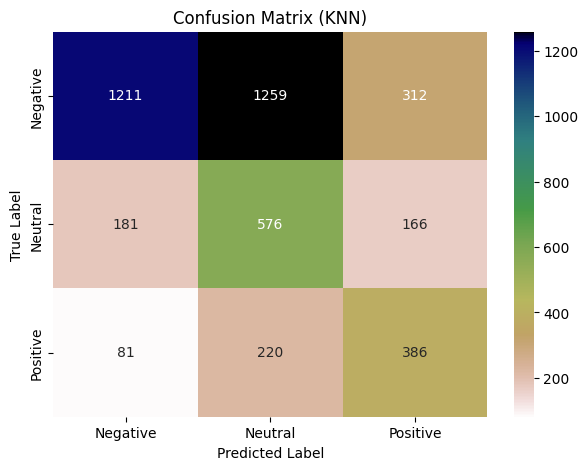

In [20]:
results_KNN = show_performance_data(y_test, y_pred, 'KNN')

In [21]:
accuracies_KNN = []
for label in labels:
    precision = results_KNN[label]['precision']
    recall = results_KNN[label]['recall']
    support = results_KNN[label]['support']
    accuracy = (precision * recall) / (precision + recall) * support
    accuracies_KNN.append(accuracy)

precision_scores_KNN = [results_KNN[label]['precision'] for label in labels]
recall_scores_KNN = [results_KNN[label]['recall'] for label in labels]
f1_scores_KNN = [results_KNN[label]['f1-score'] for label in labels]

### Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest classifier on the training data
RF = RandomForestClassifier()
RF.fit(X_train_vectorized, y_train)

# Make predictions on the testing data
y_pred = RF.predict(X_test_vectorized)

              precision    recall  f1-score      support
Negative       0.759222  0.954349  0.845676  2782.000000
Neutral        0.645640  0.377031  0.476060   923.000000
Positive       0.823034  0.426492  0.561841   687.000000
accuracy       0.750455  0.750455  0.750455     0.750455
macro avg      0.742632  0.585958  0.627859  4392.000000
weighted avg   0.745334  0.750455  0.723602  4392.000000


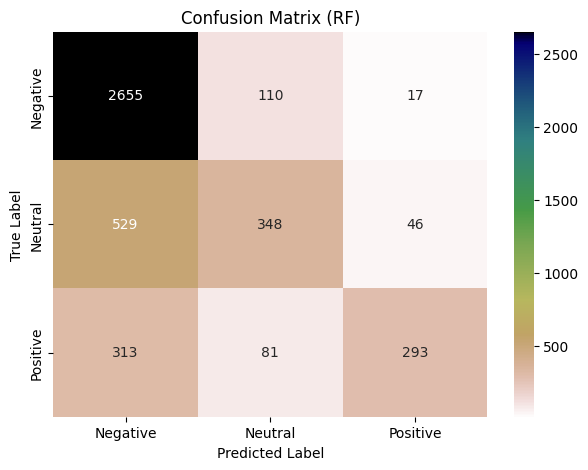

In [23]:
results_RF = show_performance_data(y_test, y_pred, 'RF')

In [24]:
accuracies_RF = []
for label in labels:
    precision = results_RF[label]['precision']
    recall = results_RF[label]['recall']
    support = results_RF[label]['support']
    accuracy = (precision * recall) / (precision + recall) * support
    accuracies_RF.append(accuracy)

precision_scores_RF = [results_RF[label]['precision'] for label in labels]
recall_scores_RF = [results_RF[label]['recall'] for label in labels]
f1_scores_RF = [results_RF[label]['f1-score'] for label in labels]

### Gradient Boosting Classifier

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

# Train a Gradient Boosting classifier on the training data
GBC = GradientBoostingClassifier()
GBC.fit(X_train_vectorized, y_train)

# Make predictions on the testing data
y_pred = GBC.predict(X_test_vectorized)

              precision    recall  f1-score      support
Negative       0.738744  0.955428  0.833229  2782.000000
Neutral        0.693103  0.217768  0.331410   923.000000
Positive       0.753968  0.553130  0.638119   687.000000
accuracy       0.737477  0.737477  0.737477     0.737477
macro avg      0.728605  0.575442  0.600919  4392.000000
weighted avg   0.731534  0.737477  0.697250  4392.000000


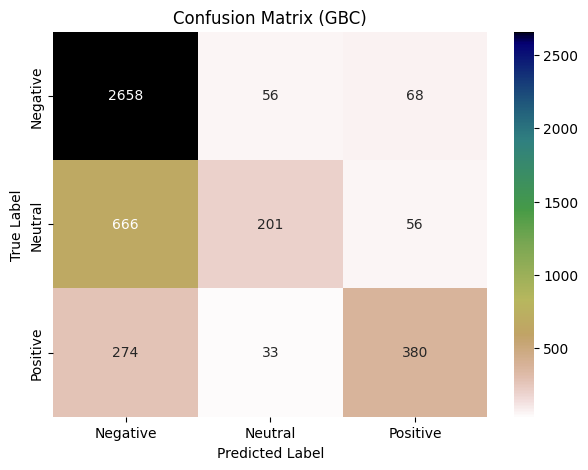

In [26]:
results_GBC = show_performance_data(y_test, y_pred, 'GBC')

In [27]:
accuracies_GBC = []
for label in labels:
    precision = results_GBC[label]['precision']
    recall = results_GBC[label]['recall']
    support = results_GBC[label]['support']
    accuracy = (precision * recall) / (precision + recall) * support
    accuracies_GBC.append(accuracy)

precision_scores_GBC = [results_GBC[label]['precision'] for label in labels]
recall_scores_GBC = [results_GBC[label]['recall'] for label in labels]
f1_scores_GBC = [results_GBC[label]['f1-score'] for label in labels]

## Model Comparision

In [28]:
#Creates a bar graph comparing metrics of each model.
import os

def plot_sentiment_metric(results, metric, save_path=None):
    labels = ['Negative', 'Neutral', 'Positive']
    data = []
    for model, result in results.items():
        data.append({
            'model': model,
            'sentiment': 'Negative',
            metric: result['Negative'][metric],
        })
        data.append({
            'model': model,
            'sentiment': 'Neutral',
            metric: result['Neutral'][metric],
        })
        data.append({
            'model': model,
            'sentiment': 'Positive',
            metric: result['Positive'][metric],
        })
    df = pd.DataFrame(data)
    sns.catplot(x='sentiment', y=metric, hue='model', kind='bar', data=df)
    plt.xlabel("Sentiments")
    plt.ylabel(metric.capitalize())
    plt.title(f"{metric.capitalize()} comparison of all the models with respect to sentiments")
    
    if save_path:
        if not os.path.exists(os.path.dirname(save_path)):
            os.makedirs(os.path.dirname(save_path))
        plt.savefig(save_path, bbox_inches='tight')
        print(f"Plot saved at {save_path}")
    else:
        plt.show()

Plot saved at C:/Users/vinhm/OneDrive/Documents/School Documents/Springboard/Springboard/Capstone Project 3.1/Notebooks/Sentiment_Metric_precision.png


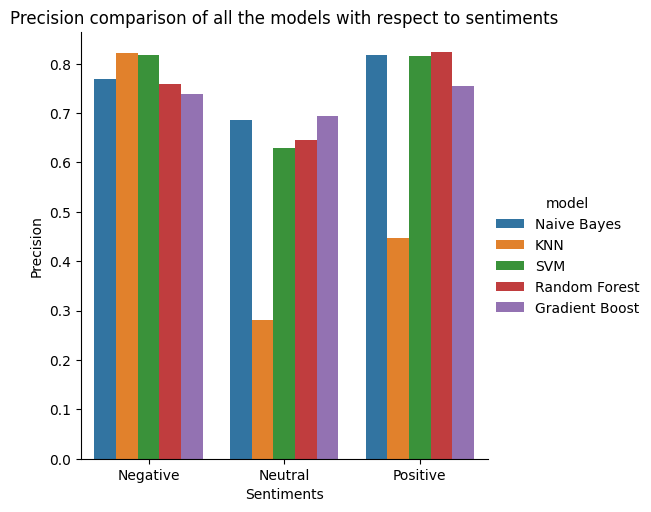

In [29]:
# Plot for precision
results = {'Naive Bayes':results_NB, 'KNN':results_KNN, 'SVM':results_SVM, 'Random Forest':results_RF, 'Gradient Boost':results_GBC}
metric = 'precision'

plot_sentiment_metric(results, metric, save_path='C:/Users/vinhm/OneDrive/Documents/School Documents/Springboard/Springboard/Capstone Project 3.1/Notebooks/Sentiment_Metric_precision.png')

Plot saved at C:/Users/vinhm/OneDrive/Documents/School Documents/Springboard/Springboard/Capstone Project 3.1/Notebooks/Sentiment_Metric_recall.png


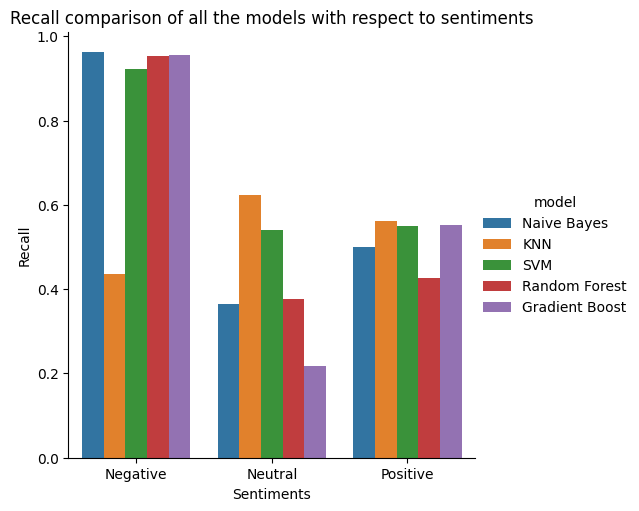

In [30]:
# Plot for recall
metric = 'recall'

plot_sentiment_metric(results, metric, save_path='C:/Users/vinhm/OneDrive/Documents/School Documents/Springboard/Springboard/Capstone Project 3.1/Notebooks/Sentiment_Metric_recall.png')

Plot saved at C:/Users/vinhm/OneDrive/Documents/School Documents/Springboard/Springboard/Capstone Project 3.1/Notebooks/Sentiment_Metric_f1-score.png


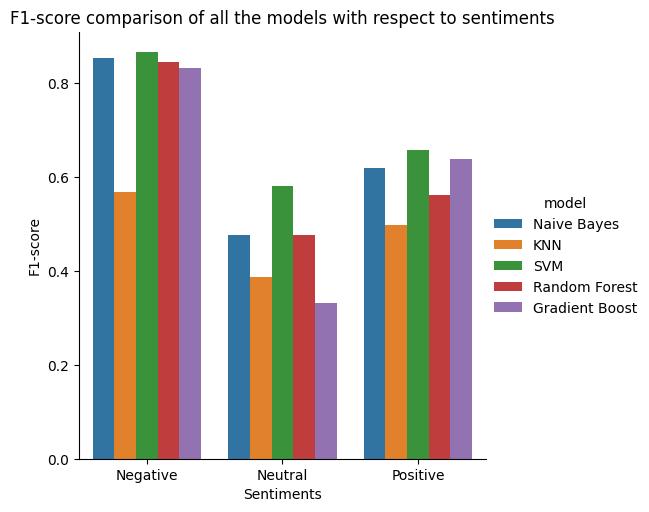

In [31]:
# Plot for f1-score
metric = 'f1-score'

plot_sentiment_metric(results, metric, save_path='C:/Users/vinhm/OneDrive/Documents/School Documents/Springboard/Springboard/Capstone Project 3.1/Notebooks/Sentiment_Metric_f1-score.png')

Plot saved at C:/Users/vinhm/OneDrive/Documents/School Documents/Springboard/Springboard/Capstone Project 3.1/Notebooks/Overall weighted scores.png


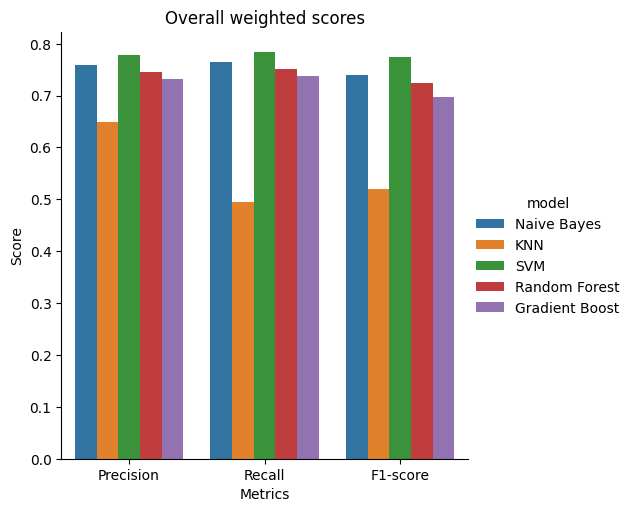

In [32]:
#Overall weighted score for each metric in each model.
labels = ['Precision', 'Recall', 'F1-score']

data = []
for model, result in results.items():
    data.append({
        'model': model,
        'metric': 'Precision',
        'score': result['weighted avg']['precision'],
    })
    data.append({
        'model': model,
        'metric': 'Recall',
        'score': result['weighted avg']['recall'],
    })
    data.append({
        'model': model,
        'metric': 'F1-score',
        'score': result['weighted avg']['f1-score'],
    })

df = pd.DataFrame(data)
sns.catplot(x='metric', y='score', hue='model', kind='bar', data=df)
plt.xlabel("Metrics")
plt.ylabel('Score')
plt.title("Overall weighted scores")

save_path = "C:/Users/vinhm/OneDrive/Documents/School Documents/Springboard/Springboard/Capstone Project 3.1/Notebooks/Overall weighted scores.png"
if save_path:
    if not os.path.exists(os.path.dirname(save_path)):
        os.makedirs(os.path.dirname(save_path))
    plt.savefig(save_path, bbox_inches='tight')
    print(f"Plot saved at {save_path}")
else:
    plt.show()

While SVM seems to have done the best for Sentiment Classification in 'Overall Weighted Scores', all of the models performed well. As we can see from the plots, Random Forest outperforms the other classifiers in terms of precision and Support Vector Machine (SVM) is best in F1-score, while the Naive Bayes classifier has the highest recall score, barely. Overall, all of the classifiers performed relatively well on this sentiment analysis task.

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

# Define classifiers
nb = MultinomialNB()
knn = KNeighborsClassifier()
svm = SVC()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()

# Create a list of classifiers to iterate over
classifiers = [nb, knn, svm, rf, gb]

# Create an empty pandas DataFrame to store the results
results = pd.DataFrame(columns=['Classifier', 'F1-score', 'Standard deviation'])

# Iterate over classifiers
for clf in classifiers:
    # Perform 5-fold cross-validation
    scores = cross_val_score(clf, X_train_vectorized, y_train, cv=5, scoring='f1_macro')
    # Calculate mean and standard deviation of F1-scores
    mean_score = scores.mean()
    std_score = scores.std()
    # Add results to pandas DataFrame
    results = pd.concat([results, pd.DataFrame({'Classifier': [clf.__class__.__name__], 'F1-score': [mean_score], 'Standard deviation': [std_score]})], ignore_index=True)

# Save results to Excel file
results.to_excel('cv_results.xlsx', index=False)

In [34]:
print(results)

                   Classifier  F1-score  Standard deviation
0               MultinomialNB  0.664382            0.011754
1        KNeighborsClassifier  0.486554            0.014420
2                         SVC  0.696590            0.006289
3      RandomForestClassifier  0.642429            0.007037
4  GradientBoostingClassifier  0.600239            0.009254


Cross Validation confirms that SVM performs the best for the given data.

## Hyperparameter Tuning for SVM

In [35]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the SVM estimator
svm = SVC()

# Define the hyperparameter grid to search
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']}

# Perform grid search with cross-validation
svm_grid = GridSearchCV(svm, param_grid=param_grid, cv=5, scoring='f1_macro')
svm_grid.fit(X_train_vectorized, y_train)

# Print the best hyperparameters and corresponding score
print("Best hyperparameters: ", svm_grid.best_params_)
print("Best F1 score: {:.4f}".format(svm_grid.best_score_))

Best hyperparameters:  {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best F1 score: 0.7299


Apply the hyperparameters to the SVM model

In [36]:
# Create an SVM classifier with the optimal hyperparameters
svm_clf = SVC(C=10, kernel='rbf', gamma=0.01)

# Fit the classifier to the training data
svm_clf.fit(X_train_vectorized, y_train)

# Make predictions on the test data
y_pred = svm_clf.predict(X_test_vectorized)

# Evaluate the performance of the classifier using the F1-score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)

F1-score: 0.7952596461521262


After Hyperparameter Tuning, the parameters were applied to the SVM pipeline and fitted to the input data (X) and target lavels (Y). 

              precision    recall  f1-score      support
Precision      0.856451  0.890007  0.872907  2782.000000
Recall         0.627729  0.622969  0.625340   923.000000
F1-score       0.770940  0.656477  0.709119   687.000000
accuracy       0.797359  0.797359  0.797359     0.797359
macro avg      0.751707  0.723151  0.735789  4392.000000
weighted avg   0.795008  0.797359  0.795260  4392.000000


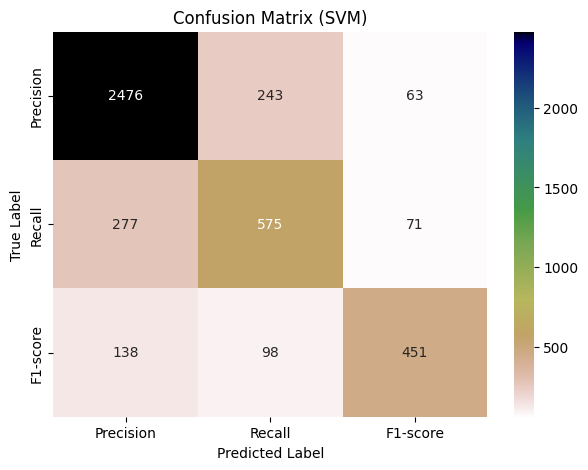

In [37]:
results_svm  = show_performance_data(y_test, y_pred, 'SVM')

### Conclusion

In this study, we applied SVM with hyperparameter tuning to classify airline-related tweets into positive, negative, and neutral sentiments, using the F1-score as the evaluation metric. Our results show that our model achieved an F1-score of 0.80, indicating that it is capable of accurately predicting the sentiment of airline-related tweets.

The F1-score takes into account both precision and recall, providing a balanced measure of the model's performance. Our F1-score suggests that our model is able to effectively distinguish between positive and negative sentiments in airline-related tweets, achieving a high level of accuracy in its predictions.

Overall, the use of SVM with hyperparameter tuning and the F1-score evaluation metric allowed us to build a highly accurate sentiment analysis model for airline-related tweets. This model can be useful for airlines in monitoring customer feedback and improving their services accordingly.

In [38]:
import pickle

# Save the trained model to a file
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(svm_clf, f)